In [2]:
from bs4 import BeautifulSoup
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from pandas_datareader import data as web
import os
import string
import requests
import nltk
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

 <font face="Times New Roman" size=5 color=#000000>
   NLP using SentimentIntensityAnalyzer

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import pandas as pd

In [6]:
#import data
news_df = pd.read_csv('newscleaned2.csv')

In [7]:
# Scoring news with sentiment analysis
sia = SIA()
title = []
abstract = []

for line in news_df['News_title']:
    pol_score = sia.polarity_scores(line)
    title.append(pol_score)

for line in news_df['News_abstract']:
    pol_score = sia.polarity_scores(line)
    abstract.append(pol_score)

title_score2 = [item['compound'] for item in title]
abs_score2 = [item['compound'] for item in abstract]

In [8]:
# #Combine Data
# variables_df = pd.read_csv('df_combine.csv')
# df = pd.read_csv('LabeledY.csv')
# df2 = pd.read_csv('df_combine.csv')
# variables_df['LabeledY1'] = df['LabledY1']
# variables_df['LabeledY2'] = df['LabledY2']
# variables_df['title_score1'] = df2['title_score1']
# variables_df['abs_score1'] = df2['abs_score1']
# variables_df['title_score2'] = title_score2
# variables_df['abs_score2'] = abs_score2

# variables_df = variables_df[['Attributes','High','Low','Open','Close','Volume','Adj Close','Daily Growth','LabeledY1','LabeledY2','title_score1','abs_score1','title_score2','abs_score2']]
# variables_df.columns = ['Date','High','Low','Open','Close','Volume','Adj Close','Daily Growth','LabeledY1','LabeledY2','title_score1','abs_score1','title_score2','abs_score2']
# df3 = pd.read_csv('News_score3.csv')
# variables_df[['title_polarity','title_subjectivity','abs_polarity','abs_subjectivity']] = df3[['title_polarity','title_subjectivity','abs_polarity','abs_subjectivity']]
# variables_df.to_csv('News_score.csv')
# variables_df.head()
variables_df = pd.read_csv("News_score.csv")

Statistical Description of title_score2 and abs_score2

In [9]:
import pandas as pd
s = variables_df[['title_score2','abs_score2']]
s.describe()

,title_score2,abs_score2
count,508.000000,508.000000
mean,-0.227433,0.153718
std,0.821171,0.894952
min,-0.996400,-0.998400
25%,-0.961750,-0.944625
50%,-0.733100,0.797550
75%,0.792950,0.983450
max,0.994600,0.998100


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


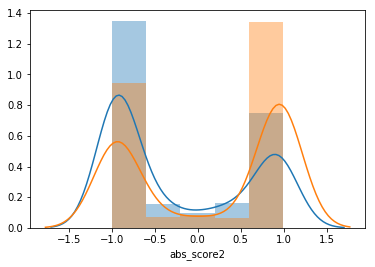

In [10]:
import seaborn as sns
sns.distplot(s['title_score2'])
sns.distplot(s['abs_score2'])

Statistical Description of polarity and subjectivity

In [11]:
import pandas as pd
s = variables_df[['title_polarity','title_subjectivity','abs_polarity','abs_subjectivity']]
s.describe()

,title_polarity,title_subjectivity,abs_polarity,abs_subjectivity
count,508.000000,508.000000,508.000000,508.000000
mean,0.059931,0.397146,0.048969,0.430825
std,0.040139,0.042458,0.021708,0.021629
min,-0.041995,0.273365,-0.001804,0.370725
25%,0.033728,0.370636,0.033255,0.415733
50%,0.058807,0.396531,0.048259,0.430852
75%,0.085724,0.422347,0.063720,0.445146
max,0.217188,0.556629,0.112616,0.490550


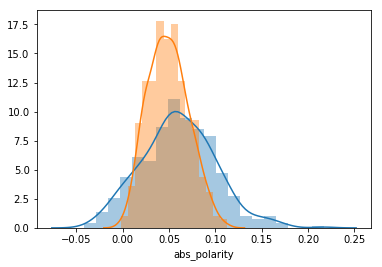

In [12]:
import seaborn as sns
sns.distplot(s['title_polarity'])
# sns.distplot(s['title_subjectivity'])
sns.distplot(s['abs_polarity'])
# sns.distplot(s['abs_subjectivity'])

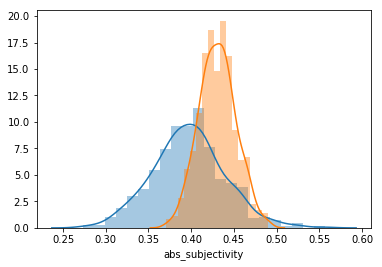

In [13]:
sns.distplot(s['title_subjectivity'])
sns.distplot(s['abs_subjectivity'])

 <font face="Times New Roman" size=5 color=#000000>
   Split Training and Testing Set (Based on Work of Ke Chen)

In [81]:
# # Splite X to TrainX and TestX 80/20
# # Splite Y to TrainY and TestY 80/20
# X = pd.read_csv("newscleaned2.csv")
# Y = variables_df['LabeledY2']
# X_score = variables_df[['title_score2','abs_score2']]
# cut = int(0.8*X.shape[0])
# Xtrain = X_score.iloc[0: cut]
# Xtest = X_score.iloc[X.shape[0]-cut:]
# Ytrain = Y.iloc[0: cut]
# Ytest = Y.iloc[Y.shape[0]-cut:]

In [14]:
# Splite X to TrainX and TestX 70/30
# Splite Y to TrainY and TestY 70/30
X = pd.read_csv("newscleaned2.csv")
Y = variables_df['LabeledY2']
X_score = variables_df[['title_score2','abs_score2']]
cut = int(0.8*X.shape[0])
Xtrain = X_score.iloc[0: cut]
Xtest = X_score.iloc[cut:]
Ytrain = Y.iloc[0: cut]
Ytest = Y.iloc[cut:]

In [133]:
# # Splite X to TrainX and TestX 60/40
# # Splite Y to TrainY and TestY 60/40
# X = pd.read_csv("newscleaned2.csv")
# Y = variables_df['LabeledY2']
# X_score = variables_df[['title_polarity','title_subjectivity','abs_polarity','abs_subjectivity']]
# cut = int(0.7*X.shape[0])
# Xtrain = X_score.iloc[0: cut]
# Xtest = X_score.iloc[X.shape[0]-cut:]
# Ytrain = Y.iloc[0: cut]
# Ytest = Y.iloc[Y.shape[0]-cut:]

 <font face="Times New Roman" size=5 color=#000000>
   Modeling Using XGBoost (Based on Work of Ke Chen)

In [15]:
XGBModel = XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=100, \
                              silent=True, objective='binary:logistic', nthread=-1, \
                              reg_alpha=0, reg_lambda=1, \
                              base_score=0.5, missing=None)

fit=XGBModel.fit(Xtrain, Ytrain)
print(XGBModel.score(Xtrain,Ytrain))
print(XGBModel.score(Xtest,Ytest))
pre_change = np.append(XGBModel.predict(Xtrain),XGBModel.predict(Xtest))

0.6600985221674877
0.4803921568627451


<font face="Times New Roman" size=5 color=#000000>
   Data Visualization of Results

In [16]:
import plotly
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
import pandas as pd

In [17]:
plotly.tools.set_credentials_file(username='zihan23', api_key='RPFXG0jAX3vN8oluAy4v')

Prepare Data

In [18]:
df = pd.DataFrame()
df['Date'] = variables_df['Date']
df['PreChange']= pre_change
df['LabeledY2'] = variables_df['LabeledY2']

In [19]:
trace_pre = go.Scatter(
    x=df['Date'],
    y=df['PreChange'],
    name = "PredictedScore",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_act = go.Scatter(
    x=df['Date'],
    y=df['LabeledY2'],
    name = "ActualScore",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_pre,trace_act]

layout = dict(
    title='Compare of Predicted and Actual Label of SP500 Price',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Compare of Predicted and Actual Label of SP500 Price")

/usr/local/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [20]:
diff = df['PreChange']-df['LabeledY2']

In [21]:
data=[]
data.append(go.Scatter(
        x = df['Date'].values,
        y = diff.values
    ))

layout = go.Layout(dict(title = "Diff between Predicted and Actual of SP500",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Label'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [23]:
data=[]
df['title_score2'] = variables_df['title_score2']
data.append(go.Scatter(
        x = df['title_score2'].values,
        y = df['PreChange'].values
    ))

layout = go.Layout(dict(title = "Regression of News and Price",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Label'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')